In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

abalone = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv")

abalone.info()
abalone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
# Splitting the data into two groups


male = abalone[(abalone['Sex'] == 'M')]
male.info()

female = abalone[(abalone['Sex'] == 'F')]
female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1528 non-null   object 
 1   Length                 1528 non-null   float64
 2   Diameter               1528 non-null   float64
 3   Height                 1528 non-null   float64
 4   Whole_weight           1528 non-null   float64
 5   Shucked_weight         1528 non-null   float64
 6   Viscera_weight         1528 non-null   float64
 7   Shell_weight           1528 non-null   float64
 8   Class_number_of_rings  1528 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 113.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1307 non-null   obje

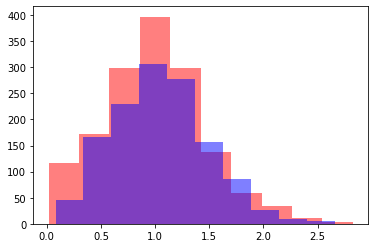

In [8]:
# Checking for normal distribution

plt.hist(male['Whole_weight'], alpha = .5, color='r')
plt.hist(female['Whole_weight'], alpha = .5, color='b')
plt.show()

In [4]:
# Checking the skewness and kurtosis

print(stats.describe(male['Whole_weight']))
print(stats.describe(female['Whole_weight']))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


In [5]:
# Performing ttest

stats.ttest_ind(male['Whole_weight'], female['Whole_weight'])


Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

### Based on the skewness and kurtosis we can use this data to answer the question statistically. 

### The formal hypothesis: On average female abalones have a greater whole weight than male abalones. 

### The p-value is .001 and is less than .05 so we should reject the null. The onus will be on someone else to prove that male abalones on average have a greater whole weight than female abalones in their population samples. The significance level between the means is large enough to explore the data further. 